In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/cats_vs_dogs_small.zip

Archive:  /content/drive/MyDrive/cats_vs_dogs_small.zip
   creating: cats_vs_dogs_small/
   creating: cats_vs_dogs_small/test/
   creating: cats_vs_dogs_small/test/cats/
  inflating: cats_vs_dogs_small/test/cats/1500.jpg  
  inflating: cats_vs_dogs_small/test/cats/1501.jpg  
  inflating: cats_vs_dogs_small/test/cats/1502.jpg  
  inflating: cats_vs_dogs_small/test/cats/1503.jpg  
  inflating: cats_vs_dogs_small/test/cats/1504.jpg  
  inflating: cats_vs_dogs_small/test/cats/1505.jpg  
  inflating: cats_vs_dogs_small/test/cats/1506.jpg  
  inflating: cats_vs_dogs_small/test/cats/1507.jpg  
  inflating: cats_vs_dogs_small/test/cats/1508.jpg  
  inflating: cats_vs_dogs_small/test/cats/1509.jpg  
  inflating: cats_vs_dogs_small/test/cats/1510.jpg  
  inflating: cats_vs_dogs_small/test/cats/1511.jpg  
  inflating: cats_vs_dogs_small/test/cats/1512.jpg  
  inflating: cats_vs_dogs_small/test/cats/1513.jpg  
  inflating: cats_vs_dogs_small/test/cats/1514.jpg  
  inflating: cats_vs_dogs_small/tes

In [4]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

# === Define directory and load datasets ===
data_dir = "/content/cats_vs_dogs_small"


In [5]:
# Full training dataset
complete_train_data = image_dataset_from_directory(
    os.path.join(data_dir, "train"),
    image_size=(160, 160),  # Slightly different image size
    batch_size=32,
    shuffle=True,
    seed=123  # Different seed
)


Found 2000 files belonging to 2 classes.


In [6]:
# Validation and test datasets
val_data = image_dataset_from_directory(
    os.path.join(data_dir, "validation"),
    image_size=(160, 160),
    batch_size=32
)

test_data = image_dataset_from_directory(
    os.path.join(data_dir, "test"),
    image_size=(160, 160),
    batch_size=32
)

Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## === Step 1: CNN from Scratch with 1000 Training Samples ===

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - accuracy: 0.4881 - loss: 0.7125 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4963 - loss: 0.6935 - val_accuracy: 0.4990 - val_loss: 0.6906
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5371 - loss: 0.6914 - val_accuracy: 0.5950 - val_loss: 0.6768
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5474 - loss: 0.6861 - val_accuracy: 0.5620 - val_loss: 0.6830
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5530 - loss: 0.6796 - val_accuracy: 0.5930 - val_loss: 0.6607
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5615 - loss: 0.6854 - val_accuracy: 0.5330 - val_loss: 0.6766
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.5451 - loss: 0.6758 - val_accuracy: 0.5530 - val_loss: 0.7323
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5313 - loss: 0.7081 - val_accuracy: 0.5540 -

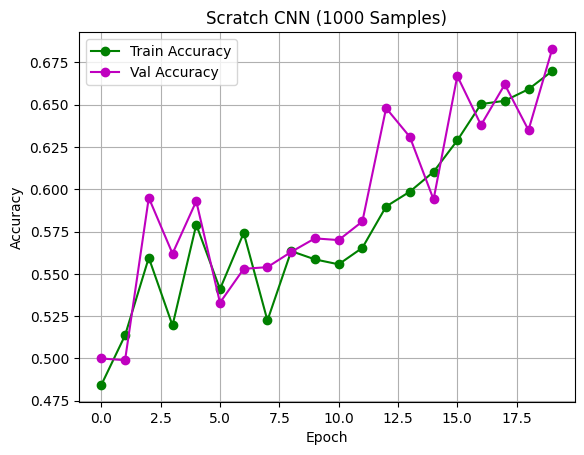

In [7]:
# === Step 1: CNN from Scratch with 1000 Training Samples ===
train_data_1000 = complete_train_data.take(32)  # Approx. 1000 samples (32 batches)

# Data augmentation layer
augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),  # Slightly different rotation factor
    layers.RandomZoom(0.25)       # Slightly different zoom
])

# Define CNN architecture
input_layer = keras.Input(shape=(160, 160, 3))
x = augmentation(input_layer)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)  # Added padding
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)  # Slightly different dropout rate
output_layer = layers.Dense(1, activation="sigmoid")(x)

cnn_model = keras.Model(input_layer, output_layer)
cnn_model.compile(optimizer="adam",  # Different optimizer
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

# Train the model
training_history = cnn_model.fit(train_data_1000, epochs=20, validation_data=val_data)

# Evaluate on test set
test_loss_scratch_1000, test_acc_scratch_1000 = cnn_model.evaluate(test_data)
print(f"Test Accuracy (Scratch CNN, 1000 samples): {test_acc_scratch_1000:.3f}")

# Plot results
train_acc = training_history.history["accuracy"]
val_acc = training_history.history["val_accuracy"]
plt.figure()
plt.plot(train_acc, "go-", label="Train Accuracy")
plt.plot(val_acc, "mo-", label="Val Accuracy")
plt.title("Scratch CNN (1000 Samples)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("scratch_cnn_1000.png")
plt.show()


# # === Step 2: CNN from Scratch with 2000 Training Samples ===

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.4919 - loss: 0.6961 - val_accuracy: 0.5910 - val_loss: 0.6753
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5672 - loss: 0.6839 - val_accuracy: 0.6070 - val_loss: 0.6666
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5796 - loss: 0.6728 - val_accuracy: 0.6190 - val_loss: 0.6433
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6281 - loss: 0.6420 - val_accuracy: 0.6360 - val_loss: 0.6596
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.6578 - loss: 0.6323 - val_accuracy: 0.6510 - val_loss: 0.6186
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6670 - loss: 0.6206 - val_accuracy: 0.6400 - val_loss: 0.6555
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6892 - loss: 0.6018 - val_accuracy: 0.6730 - val_loss: 0.5968
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6436 - loss: 0.6119 - val_accuracy: 0.6960 - v

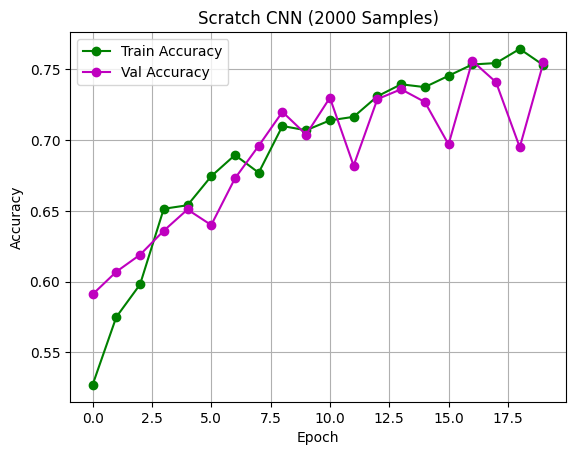

In [8]:
# === Step 2: CNN from Scratch with 2000 Training Samples ===
train_data_2000 = complete_train_data.take(63)  # Approx. 2000 samples (63 batches)

# Reuse augmentation and redefine model
input_layer = keras.Input(shape=(160, 160, 3))
x = augmentation(input_layer)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
output_layer = layers.Dense(1, activation="sigmoid")(x)

cnn_model_2000 = keras.Model(input_layer, output_layer)
cnn_model_2000.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

# Train and evaluate
training_history_2000 = cnn_model_2000.fit(train_data_2000, epochs=20, validation_data=val_data)
test_loss_scratch_2000, test_acc_scratch_2000 = cnn_model_2000.evaluate(test_data)
print(f"Test Accuracy (Scratch CNN, 2000 samples): {test_acc_scratch_2000:.3f}")

# Plot
train_acc_2000 = training_history_2000.history["accuracy"]
val_acc_2000 = training_history_2000.history["val_accuracy"]
plt.figure()
plt.plot(train_acc_2000, "go-", label="Train Accuracy")
plt.plot(val_acc_2000, "mo-", label="Val Accuracy")
plt.title("Scratch CNN (2000 Samples)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("scratch_cnn_2000.png")
plt.show()


# # === Step 3: CNN from Scratch with 1500 Training Samples ===

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4898 - loss: 0.7005 - val_accuracy: 0.5130 - val_loss: 0.6916
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5380 - loss: 0.6922 - val_accuracy: 0.4990 - val_loss: 0.6923
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5093 - loss: 0.6911 - val_accuracy: 0.5730 - val_loss: 0.6762
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5624 - loss: 0.6816 - val_accuracy: 0.5420 - val_loss: 0.7143
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5789 - loss: 0.6722 - val_accuracy: 0.5970 - val_loss: 0.6524
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.6206 - loss: 0.6549 - val_accuracy: 0.6360 - val_loss: 0.6367
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.5701 - loss: 0.6913 - val_accuracy: 0.6620 - val_loss: 0.6411
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6566 - loss: 0.6420 - val_accuracy: 0.6880 - v

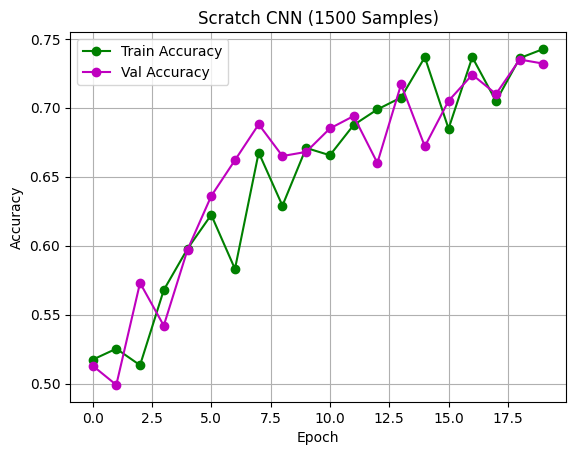

In [9]:
# === Step 3: CNN from Scratch with 1500 Training Samples ===
train_data_1500 = complete_train_data.take(47)  # Approx. 1500 samples (47 batches)

# Define model again
input_layer = keras.Input(shape=(160, 160, 3))
x = augmentation(input_layer)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.4)(x)
output_layer = layers.Dense(1, activation="sigmoid")(x)

cnn_model_1500 = keras.Model(input_layer, output_layer)
cnn_model_1500.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

# Train and evaluate
training_history_1500 = cnn_model_1500.fit(train_data_1500, epochs=20, validation_data=val_data)
test_loss_scratch_1500, test_acc_scratch_1500 = cnn_model_1500.evaluate(test_data)
print(f"Test Accuracy (Scratch CNN, 1500 samples): {test_acc_scratch_1500:.3f}")

# Plot
train_acc_1500 = training_history_1500.history["accuracy"]
val_acc_1500 = training_history_1500.history["val_accuracy"]
plt.figure()
plt.plot(train_acc_1500, "go-", label="Train Accuracy")
plt.plot(val_acc_1500, "mo-", label="Val Accuracy")
plt.title("Scratch CNN (1500 Samples)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("scratch_cnn_1500.png")
plt.show()



# # === Step 4: Pretrained VGG16 with Different Sample Sizes ===


🚀 Starting training for VGG16 - 1000 Samples...
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.5701 - loss: 5.4974 - val_accuracy: 0.8840 - val_loss: 1.0148
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7832 - loss: 2.2469 - val_accuracy: 0.9490 - val_loss: 0.5668
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.8518 - loss: 1.3633 - val_accuracy: 0.9590 - val_loss: 0.4930
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.8511 - loss: 1.3909 - val_accuracy: 0.9630 - val_loss: 0.4414
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.9162 - loss: 0.6080 - val_accuracy: 0.9560 - val_loss: 0.4297
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.8784 - loss: 1.0603 - val_accuracy: 0.9640 - val_loss: 0.4156
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9055 - loss: 0.7739 - val_accuracy: 0.9630 - val_loss: 0.4225
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - 

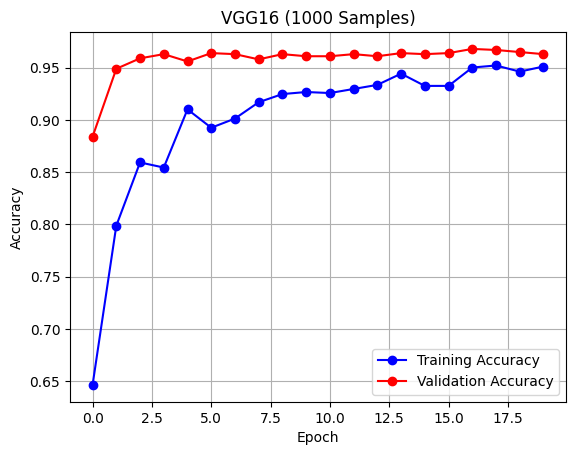

In [11]:
# === Step 4: Pretrained VGG16 with Different Sample Sizes ===
def train_pretrained_vgg16(train_dataset, val_dataset, model_label):
    print(f"\n🚀 Starting training for {model_label}...")

    # Augmentation
    aug_layer = keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25),
    ])

    # Load VGG16 base
    vgg_base = keras.applications.vgg16.VGG16(
        weights="imagenet",
        include_top=False,
        input_shape=(160, 160, 3)
    )
    vgg_base.trainable = False  # Freeze the base

    # Build model
    inputs = keras.Input(shape=(160, 160, 3))
    x = aug_layer(inputs)
    x = keras.applications.vgg16.preprocess_input(x)
    x = vgg_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation="relu")(x)  # Different dense layer size
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    vgg_model = keras.Model(inputs, outputs)

    # Compile with custom settings
    vgg_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=2e-5),  # Different optimizer and rate
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Add early stopping
    callbacks_list = [
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
    ]

    # Train
    history = vgg_model.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=callbacks_list)

    # Evaluate
    loss, acc = vgg_model.evaluate(test_data)
    print(f"{model_label} - Test Accuracy: {acc:.3f}")
    return history

# VGG16 with 1000 samples
train_data_vgg_1000 = complete_train_data.take(32)
history_vgg_1000 = train_pretrained_vgg16(train_data_vgg_1000, val_data, "VGG16 - 1000 Samples")

# VGG16 with 1500 samples
train_data_vgg_1500 = complete_train_data.take(47)
history_vgg_1500 = train_pretrained_vgg16(train_data_vgg_1500, val_data, "VGG16 - 1500 Samples")

# VGG16 with 2000 samples
train_data_vgg_2000 = complete_train_data.take(63)
history_vgg_2000 = train_pretrained_vgg16(train_data_vgg_2000, val_data, "VGG16 - 2000 Samples")

# Plot VGG16 Results
def plot_vgg_history(history, title, filename):
    train_acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    plt.figure()
    plt.plot(train_acc, "bo-", label="Training Accuracy")
    plt.plot(val_acc, "ro-", label="Validation Accuracy")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

plot_vgg_history(history_vgg_1000, "VGG16 (1000 Samples)", "vgg16_1000.png")

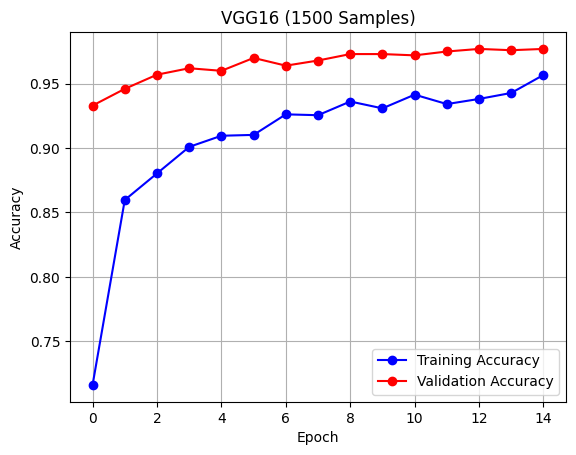

In [12]:
plot_vgg_history(history_vgg_1500, "VGG16 (1500 Samples)", "vgg16_1500.png")

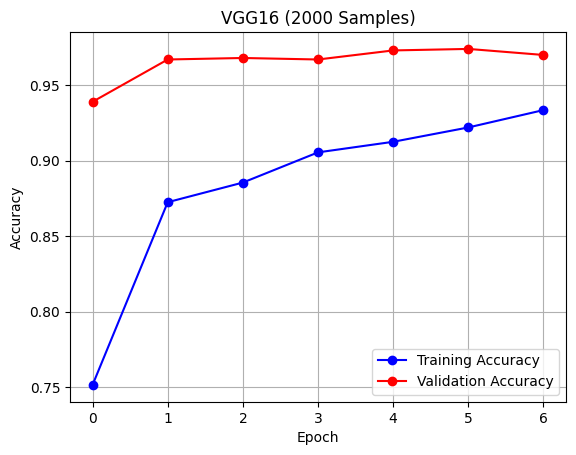

In [13]:
plot_vgg_history(history_vgg_2000, "VGG16 (2000 Samples)", "vgg16_2000.png")